✅ 'students.csv' created successfully!

📌 First 5 rows of the dataset:
   Student_ID  Gender    Stream Attendance_Level Exam_Result Participation
0           1    Male      Arts             High        Pass        Medium
1           2  Female  Commerce           Medium        Pass           Low
2           3    Male      Arts              Low        Fail        Medium
3           4    Male      Arts             High        Pass           Low
4           5    Male   Science           Medium        Pass        Active

📊 Cross-tabulation: Attendance_Level vs Exam_Result
Exam_Result       Fail  Pass
Attendance_Level            
High                 8    14
Low                 10     9
Medium               5     4

Chi-square test for Attendance vs Exam Result:
Chi2 = 1.49, p-value = 0.4748, DoF = 2
❌ No significant association (p >= 0.05)

📊 Cross-tabulation: Gender vs Stream
Stream  Arts  Commerce  Science
Gender                         
Female     8        14        5
Male       7       

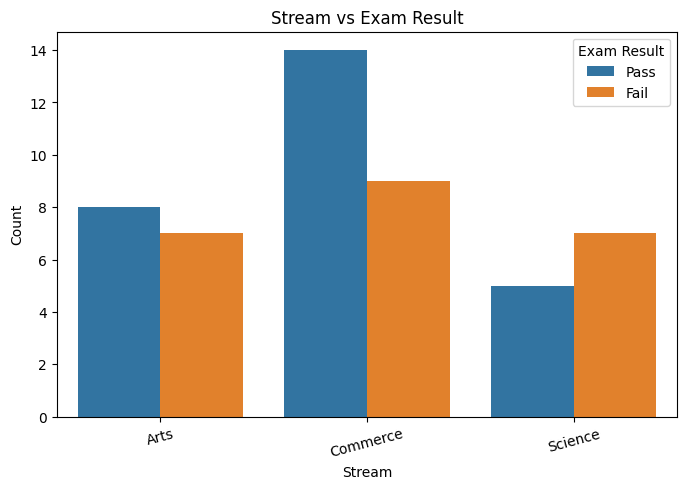

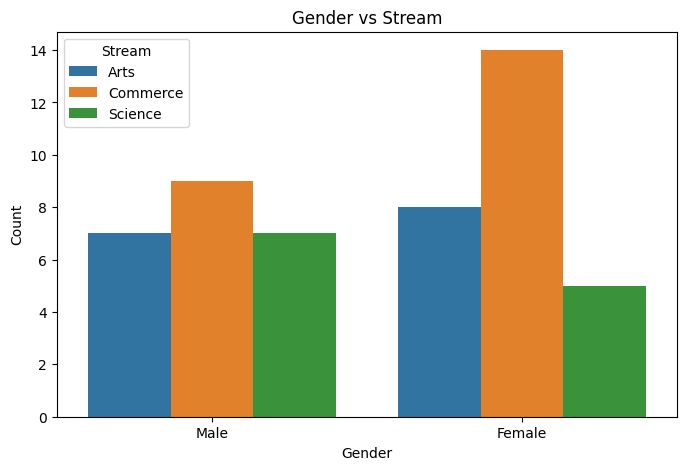

In [1]:
# ==============================
# 📊 Bivariate Analysis - Students Dataset
# ==============================

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Generate the dataset
np.random.seed(42)  # for reproducibility

n = 50
student_id = range(1, n+1)
genders = np.random.choice(['Male', 'Female'], size=n)
streams = np.random.choice(['Science', 'Commerce', 'Arts'], size=n)
attendance = np.random.choice(['High', 'Medium', 'Low'], size=n)
exam_result = np.random.choice(['Pass', 'Fail'], size=n)
participation = np.random.choice(['Active', 'Medium', 'Low'], size=n)

df = pd.DataFrame({
    'Student_ID': student_id,
    'Gender': genders,
    'Stream': streams,
    'Attendance_Level': attendance,
    'Exam_Result': exam_result,
    'Participation': participation
})

# 2️⃣ Save to CSV
df.to_csv('students.csv', index=False)
print("✅ 'students.csv' created successfully!\n")

# 3️⃣ Load and preview the dataset
data = pd.read_csv('students.csv')
print("📌 First 5 rows of the dataset:")
print(data.head())

# ==============================
# 4️⃣ Bivariate Analysis
# ==============================

# Example 1: Attendance_Level vs Exam_Result (Categorical × Categorical)
ct1 = pd.crosstab(data['Attendance_Level'], data['Exam_Result'])
print("\n📊 Cross-tabulation: Attendance_Level vs Exam_Result")
print(ct1)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct1)
print(f"\nChi-square test for Attendance vs Exam Result:")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}, DoF = {dof}")
if p < 0.05:
    print("✅ Significant association found (p < 0.05)")
else:
    print("❌ No significant association (p >= 0.05)")

# Example 2: Gender vs Stream (Categorical × Categorical)
ct2 = pd.crosstab(data['Gender'], data['Stream'])
print("\n📊 Cross-tabulation: Gender vs Stream")
print(ct2)

chi2_2, p2, dof2, expected2 = chi2_contingency(ct2)
print(f"\nChi-square test for Gender vs Stream:")
print(f"Chi2 = {chi2_2:.2f}, p-value = {p2:.4f}, DoF = {dof2}")
if p2 < 0.05:
    print("✅ Significant association found (p < 0.05)")
else:
    print("❌ No significant association (p >= 0.05)")

# ==============================
# 5️⃣ Visualization
# ==============================

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Stream', hue='Exam_Result')
plt.title('Stream vs Exam Result')
plt.xlabel('Stream')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend(title='Exam Result')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Gender', hue='Stream')
plt.title('Gender vs Stream')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stream')
plt.show()
